In [4]:
# Import modules
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Use Kaggle dataset
stock_data = pd.read_csv("./GOOG.csv")

In [43]:
# Initialize dataframe
df = pd.DataFrame(stock_data)
# Drop first row to ensure minimal confusion when period setting
df = df.iloc[1:]
df["Adj Close"] = df["Adj Close"].astype(float)
df["Volume"] = df["Volume"].astype(float)
df["Open"] = df["Open"].astype(float)
df["High"] = df["High"].astype(float)
df["Low"] = df["Low"].astype(float)
df["Close"] = df["Close"].astype(float)

In [10]:
df = df.dropna()
df = df.drop_duplicates()

In [11]:
# Initialize trading period
trading_period = len(df)

In [12]:
# Calculate stock moving averages
df['Daily Returns'] = ((df['Adj Close']- df['Open']) / df['Open'])
df['Daily Returns %'] = df["Daily Returns"] * 100
print(df.head())

        Price   Adj Close       Close        High         Low        Open  \
1  2024-01-02  139.218109  139.559998  140.615005  137.740005  139.600006   
2  2024-01-03  140.016144  140.360001  141.089996  138.429993  138.600006   
3  2024-01-04  137.701828  138.039993  140.634995  138.009995  139.850006   
4  2024-01-05  137.053421  137.389999  138.809998  136.850006  138.352005   
5  2024-01-08  140.185715  140.529999  140.639999  137.880005  138.000000   

       Volume  Daily Returns  Daily Returns %  
1  20071900.0      -0.002736        -0.273565  
2  18974300.0       0.010217         1.021744  
3  18253300.0      -0.015361        -1.536059  
4  15433200.0      -0.009386        -0.938609  
5  17645300.0       0.015839         1.583851  


In [13]:
# Calculate Annual Return (2024-01-02) - (2024-12-03)
annual_return = 100 * (df["Adj Close"].iloc[-1] - df["Adj Close"].iloc[0]) / df["Adj Close"].iloc[0]
print(annual_return)

24.279811981808454


In [14]:
# Calculate volatility, where volatility = std_dev * sqrt(trading period)
annual_volatility = df["Daily Returns"].std() * math.sqrt(trading_period)


In [15]:
peak_index = df["High"].idxmax()
peak = pd.to_numeric(df["High"][peak_index])
trough = pd.to_numeric(df["Low"][peak_index:].min())
max_drawdown = (peak - trough) / peak
print(max_drawdown)


0.23335575593641178


In [16]:
# Group data quarterly

# Q1
q1_last_index = df[df["Price"] == "2024-04-01"].index
q2_last_index = df[df["Price"] == "2024-07-01"].index
q3_last_index = df[df["Price"] == "2024-10-01"].index
# Cutoff data since we have not reached the end of the year
q4_last_index = df[df["Price"] == "2024-12-03"].index

In [17]:
# Calculate cut-off dates
# Subtract by one to represent final day of that period
jan_end = df[df["Price"] == "2024-02-01"].index[0] - 1
feb_end = df[df["Price"] == "2024-03-01"].index[0] - 1
mar_end = df[df["Price"] == "2024-04-01"].index[0] - 1

In [18]:
# Calculate Q1 returns
jan_open = df["Open"].iloc[0]
feb_open = df["Open"].iloc[jan_end + 1]
mar_open = df["Open"].iloc[feb_end + 1]
jan_returns = ((df["Adj Close"].iloc[jan_end]- df["Open"].iloc[0]) / df["Open"].iloc[0]) * 100
feb_returns = ((df["Adj Close"].iloc[feb_end] - df["Open"].iloc[jan_end+1]) / df["Open"].iloc[jan_end+1]) * 100
mar_returns = ((df["Adj Close"].iloc[mar_end] - df["Open"].iloc[feb_end+1]) / df["Open"].iloc[feb_end+1]) * 100

q1_monthly_returns = {
    "Jan": jan_returns,
    "Feb": feb_returns,
    "Mar": mar_returns,
}

In [19]:
jan_period = jan_end
feb_period = feb_end - jan_end
mar_period = mar_end - feb_end
jan_vol = df["Daily Returns"].iloc[1:jan_end].std() * math.sqrt(jan_end-1)
feb_vol = df["Daily Returns"].iloc[jan_end:feb_end].std() * math.sqrt(feb_period)
mar_vol = df["Daily Returns"].iloc[feb_end:mar_end].std() * math.sqrt(mar_period)

q1_monthly_volatility = {
    "Jan": jan_vol,
    "Feb": feb_vol,
    "Mar": mar_vol
}

In [20]:
# Quarterly Volumes
jan_volume_traded = df["Volume"].iloc[:jan_end+1].sum()
feb_volume_traded = df["Volume"].iloc[jan_end+1:feb_end+1].sum()
mar_volume_traded = df["Volume"].iloc[feb_end+1:mar_end+1].sum()


In [21]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume,Daily Returns,Daily Returns %
1,2024-01-02,139.218109,139.559998,140.615005,137.740005,139.600006,20071900.0,-0.002736,-0.273565
2,2024-01-03,140.016144,140.360001,141.089996,138.429993,138.600006,18974300.0,0.010217,1.021744
3,2024-01-04,137.701828,138.039993,140.634995,138.009995,139.850006,18253300.0,-0.015361,-1.536059
4,2024-01-05,137.053421,137.389999,138.809998,136.850006,138.352005,15433200.0,-0.009386,-0.938609
5,2024-01-08,140.185715,140.529999,140.639999,137.880005,138.000000,17645300.0,0.015839,1.583851


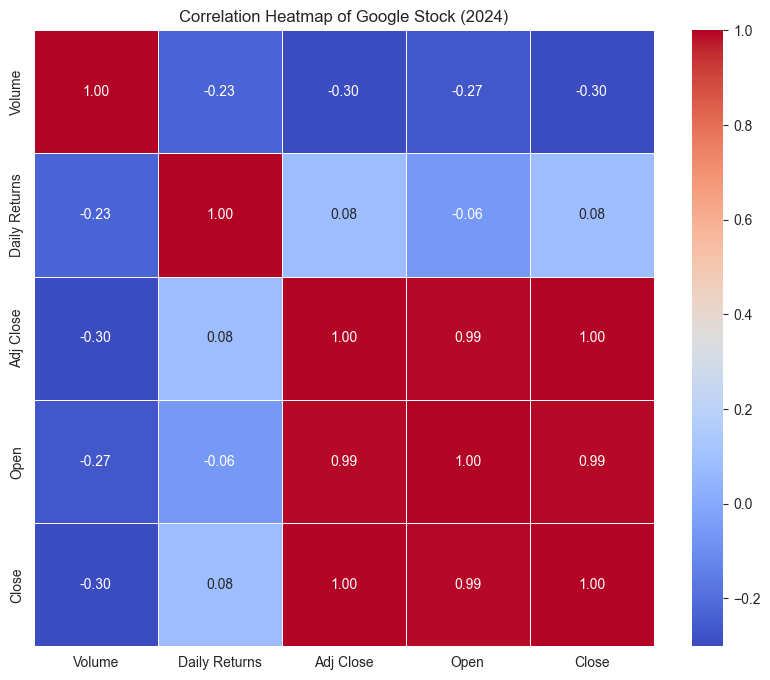

In [22]:
# Create visuals

# heat map for daily returns
columns = ['Volume', 'Daily Returns', 'Adj Close',
           'Open', 'Close']

# Calculate Correlation Matrix
correlation_matrix = df[columns].corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Google Stock (2024)")
plt.show()




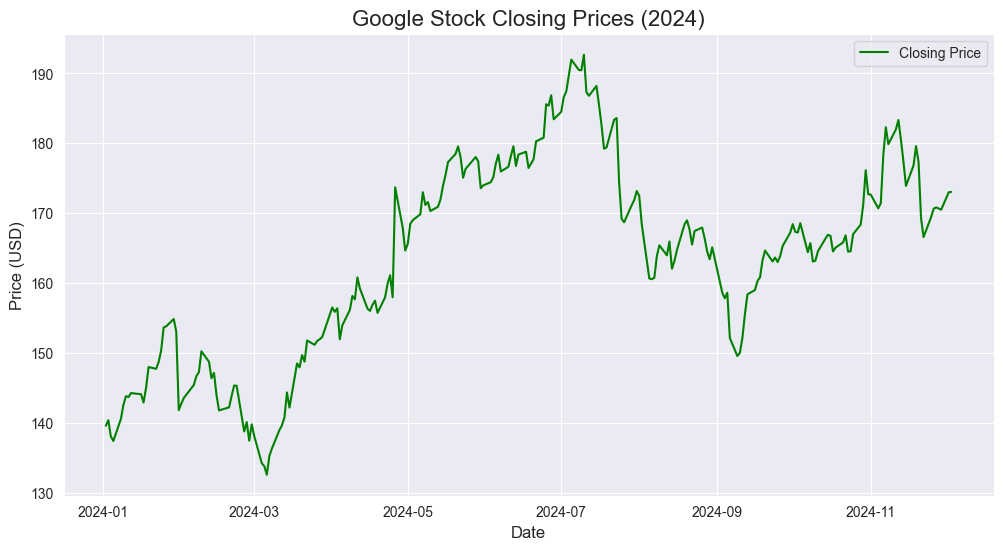

In [37]:
# Plot the Closing Price
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], df['Close'], label='Closing Price', color='green')

# Add labels and title
plt.title("Google Stock Closing Prices (2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [55]:
import plotly.graph_objects as go

# Calculate SMAs (Simple Moving Average)
df['50 SMA'] = df['Close'].rolling(50).mean()
df['200 SMA'] = df['Close'].rolling(200).mean()

# Create the candlestick chart
candle_stick_fig = go.Figure(data=[
    go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        increasing_line_color='green',
        decreasing_line_color='red'
    )
])

# Add the 50-day moving average to the chart
candle_stick_fig.add_trace(
    go.Scatter(
        x=df.index,  # Same x-axis (Date/Time)
        y=df['50 SMA'],
        mode='lines',
        name='50-Day SMA',
        line=dict(color='orange', width=1.5)
    )
)

# Add the 200-day moving average to the chart
candle_stick_fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['200 SMA'],
        mode='lines',
        name='200-Day SMA',
        line=dict(color='green', width=1.5)
    )
)

# Update layout for the chart
candle_stick_fig.update_layout(
    title='Google Stock Candlestick Chart 2024',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False,
)

# Display the chart
candle_stick_fig.show()


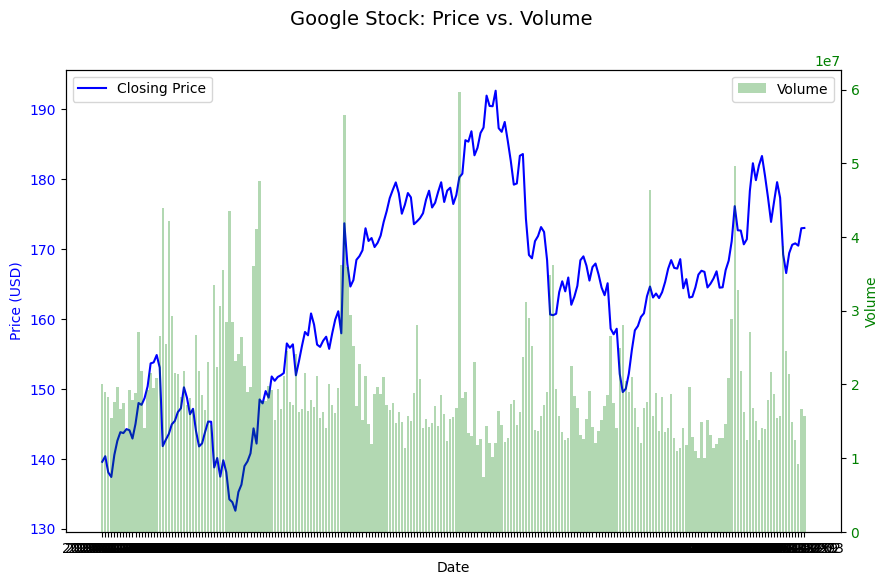

In [46]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the stock price (line chart)
ax1.plot(df['Price'], df['Close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')  # Label reflects the datetime on x-axis
ax1.set_ylabel('Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary axis for volume
ax2 = ax1.twinx()
ax2.bar(df['Price'], df['Volume'], color='green', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and legend
fig.suptitle('Google Stock: Price vs. Volume', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()